In [1]:
#Import essential libraries
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import json
import time
import math
import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

# Data Gathering

In [2]:
# Twitter archive data
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df .head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Image predictions data programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
   file.write(response.content)    
image_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# Twitter API data for retweet & fav counts # Declare Twitter API keys and access tokens

consumer_key = 'XXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#Extract based in tweet id 
extract_tweet=api.get_status(archive.tweet_id[210],tweet_mode='extended')
content=extract_tweet._json
content

In [ ]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [ ]:
#trial2 to get data another way from discourse 
extract_tweet.full_text

In [ ]:
#trial3 to get data another way from discourse 
extract_tweet.retweet_count,extract_tweet.id,extract_tweet.favorite_count

In [ ]:
#test key of specific tweet
content.keys()

In [ ]:
#check retweet & fav counts
content['retweet_count'],content['id'],content['favorite_count']

In [ ]:
#check user info
content['user'].keys()

In [ ]:
#additional info
content['user']['followers_count'],content['user']['location']

In [ ]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#Note to save time initially i didn't run above code just Accessing Project Data Without a Twitter Account however previous section was for inisghts to rerun it later  after project submission to learn more
# Read tweet's JSON data line by line
tweets=[]
with open('tweet-json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        tweets.append(tweet)
        
tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [5]:
type(tweets[0])

dict

In [6]:
#Reading JSON content as df
tweets_df = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [7]:
tweets_df.head ()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
# Convert to a DataFrame
api_df = pd.DataFrame()

# Create a DataFrame with tweet ID, retweet count, favorite count 
api_df['id']=list(map(lambda tweet: tweet['id'],tweets))
api_df['retweet_count']=list(map(lambda tweet: tweet['retweet_count'],tweets))
api_df['favorite_count']=list(map(lambda tweet: tweet['favorite_count'],tweets))
api_df['followers_count']=list(map(lambda tweet: tweet['user']['followers_count'],tweets))

# Assess Data 

In [9]:
#Display data caprured from data frame 
api_df.head()

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [10]:
#Sample from tweet achive data frame
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1201,716447146686459905,NaN,NaN,2016-04-03 02:08:05 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,NaN,NaN,NaN,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,None,None,pupper,None
1093,737310737551491075,NaN,NaN,2016-05-30 15:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737310737...,13,10,None,None,None,None,None
1350,704113298707505153,NaN,NaN,2016-02-29 01:17:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He's an inverted Uzbekistani wat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704113298...,8,10,Stanley,None,None,None,None
685,788150585577050112,NaN,NaN,2016-10-17 22:51:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,None,None,None,None
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,9,10,Shadow,None,None,None,None
1255,710609963652087808,NaN,NaN,2016-03-17 23:33:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I've watched this a million times and you prob...,NaN,NaN,NaN,https://vine.co/v/idaTpwH5TgU,12,10,None,None,None,None,None
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stubert. He just arrived. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None
550,804738756058218496,NaN,NaN,2016-12-02 17:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He accidentally opened the fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804738756...,12,10,Django,None,None,None,None
243,846139713627017216,NaN,NaN,2017-03-26 23:20:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,NaN,NaN,NaN,https://twitter.com/csncapitals/status/8460884...,13,10,None,None,None,None,None
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None


In [11]:
#tweet achive metadata
archive_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Check retweets in archive_df 
len(archive_df[archive_df.retweeted_status_id.isnull() == False])

181

In [13]:
# Sort by rating_numerator
archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [14]:
# Sort by rating_denominator 
archive_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [15]:
archive_df.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [16]:
archive_df.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

#Define:DQ Issue 1

In [17]:
# DQ Issue 1 Capturing dog tagging for doggo and floofer at the same time 
len(archive_df[(archive_df.doggo != 'None') & (archive_df.floofer != 'None')])

1

#Define:DQ Issue 2

In [18]:
# DQ Issue 2 Capturing dog tagging for doggo and pupper at the same time 
len(archive_df[(archive_df.doggo != 'None') & (archive_df.pupper != 'None')])

12

#Define:DQ Issue 3

In [19]:
# DQ Issue 3 Capturing dog tagging for doggo and puppo at the same time
len(archive_df[(archive_df.doggo != 'None') & (archive_df.puppo != 'None')])

1

In [20]:
# Capturing dog tagging for floofer and pupper at the same time 
len(archive_df[(archive_df.floofer != 'None') & (archive_df.pupper != 'None')])

0

In [21]:
# Capturing dog tagging for floofer and puppo at the same time 
len(archive_df[(archive_df.floofer != 'None') & (archive_df.puppo != 'None')])

0

In [22]:
# Capturing dog tagging for pupper and puppo columns are not None
len(archive_df[(archive_df.pupper != 'None') & (archive_df.puppo != 'None')])

0

In [23]:
# validate tweet_id
len(archive_df[archive_df.tweet_id.isnull() == True])

0

In [24]:
# validate timestamp 
len(archive_df[archive_df.timestamp.isnull() == True])

0

In [25]:
# validate source 
len(archive_df[archive_df.source.isnull() == True])

0

In [26]:
# validate text 
len(archive_df[archive_df.text.isnull() == True])

0

In [27]:
# validate retweeted_status_id 
len(archive_df[archive_df.retweeted_status_id.isnull() == True])

2175

In [28]:
# validate retweeted_status_user_id 
len(archive_df[archive_df.retweeted_status_user_id.isnull() == True])

2175

In [29]:
# validate retweeted_status_timestamp 
len(archive_df[archive_df.retweeted_status_timestamp.isnull() == True])

2175

In [30]:
# validate expanded_urls 
len(archive_df[archive_df.expanded_urls.isnull() == True])

59

In [31]:
# validate rating_numerator 
len(archive_df[archive_df.rating_numerator.isnull() == True])

0

In [32]:
# validate rating_denominator 
len(archive_df[archive_df.rating_denominator.isnull() == True])

0

In [33]:
# validate name 
len(archive_df[archive_df.name.isnull() == True])

0

In [34]:
# validate doggo 
len(archive_df[archive_df.doggo.isnull() == True])

0

In [35]:
# validate floofer 
len(archive_df[archive_df.floofer.isnull() == True])

0

In [36]:
# validate pupper 
len(archive_df[archive_df.pupper.isnull() == True])

0

In [37]:
# validate puppo 
len(archive_df[archive_df.puppo.isnull() == True])

0

In [38]:
# Check tweet_id consistency  between  archive_df and image_df
# Archive_df[~archive_df.tweet_id.isin(image_df.tweet_id)]
len(archive_df[~archive_df.tweet_id.isin(image_df.tweet_id)])

281

In [39]:
#Sample from image data frame
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
1133,728409960103686147,https://pbs.twimg.com/media/ChvU_DwWMAArx5L.jpg,1,Siamese_cat,0.478278,False,Saint_Bernard,0.094246,True,king_penguin,0.082157,False
453,674754018082705410,https://pbs.twimg.com/media/CV01M3ZWIAAV7rv.jpg,1,seashore,0.352321,False,promontory,0.131753,False,wreck,0.095597,False
781,689999384604450816,https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg,1,standard_poodle,0.444499,True,English_springer,0.129830,True,pug,0.073806,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True


In [40]:
#Image metadata
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
#Display data caprured from data frame 
api_df.sample(10)

,id,retweet_count,favorite_count,followers_count
152,862457590147678208,5388,21492,3200891
355,830583320585068544,19297,73397,3200892
1511,691096613310316544,1019,3253,3200951
1604,685667379192414208,666,2579,3200950
405,823719002937630720,12953,0,3200894
381,827228250799742977,13517,0,3200892
88,875021211251597312,4922,26022,3200891
1547,689255633275777024,1212,2805,3200951
664,790698755171364864,2203,9158,3200901
1420,698178924120031232,830,3084,3200950


In [42]:
#API metadata
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                 2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.7 KB


#Define DQ Issue 4

In [43]:
#DQ Issue 4 Discrading 4 fields that will not lead to solid analysis as a results of lot's of missing values['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls']
archive_df.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,pupper,None
318,834574053763584002,NaN,NaN,2017-02-23 01:22:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834574053...,13,10,None,doggo,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
1922,674255168825880576,NaN,NaN,2015-12-08 15:52:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobbay. He's a marshmallow wizard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674255168...,10,10,Bobbay,None,None,None,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None
955,751598357617971201,NaN,NaN,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. A cat got his tongue. 13/10 ador...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751598357...,13,10,Toby,None,None,None,None
1539,689661964914655233,NaN,NaN,2016-01-20 04:13:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Luca. He's a Butternut Scooperfloof. Glor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689661964...,12,10,Luca,None,None,None,None
1718,680176173301628928,NaN,NaN,2015-12-25 00:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680176173...,10,10,None,None,None,pupper,None


#Define DQ Issue 5

In [44]:
# validate in_reply_to_status_id resulting DQ Issue 5 having lot's of null values in archive_df.in_reply_to_status_id
len(archive_df[archive_df.in_reply_to_status_id.isnull() == True])

2278

#Define DQ Issue 6

In [45]:
# validate in_reply_to_status_id resulting DQ Issue 6 having lot's of null values in archive_df.in_reply_to_user_id
len(archive_df[archive_df.in_reply_to_user_id.isnull() == True])

2278

#Define DQ Issue 7

In [46]:
#check in_reply_to_status_id metadata 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#Define DQ Issue 8

In [47]:
#check timestamp metadata 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#Define DQ Issue 9

In [48]:
#check in_reply_to_user_id metadata 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#Define DQ Issue 10

In [49]:
#check name metadata 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#Define DQ Issue 11

In [50]:
#check tweet_id metadata 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [51]:
#check tweet_id metadata 
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
#check id metadata 
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [53]:
#DQ issue 14  need to change 'rating_numerator'and 'rating_denominator' from int to float to have proper measurment
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [58]:
#DQ Issue 15: in tweets json file need to rename columns to be more descreptive from id to tweet_id
#As recommended in review comments will keep only those rows in archive-clean that are original tweets and delete rest (i.e. retweeted_status_id column is null) hence tweet_id in tweets archive data frame need to be consistent with image predections file 
tweets_df.info()
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [59]:
#DQ Issue 16 columns in image prediction data files need to have more descreptive name 
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Tidness Issues:

#1- Tidness Issue 1: As part of analysis dogs classifications doggo,floofer,pupper and puppo should be merged into one column # dog_classification
#2  Tidness Issue 2: Copies of the original pieces of data are made prior to cleaning a tidy master dataset (or datasets, if appropriate) with all pieces of gathered data is created.

# Clean

In [60]:
# Create a copy of archive data 
archive_clean = archive_df.copy()

In [61]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [62]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [63]:
#Create copy from image_df to cleanup data
image_clean = image_df.copy()

In [64]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [65]:
image_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [66]:
#Create copy from tweets_df to cleanup data
tweets_clean = tweets_df.copy()

In [67]:
tweets_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [68]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

#Define DQ Issue 15: in tweets json file need to rename columns to be more descreptive from id to tweet_id As recommended in review comments will keep only those rows in archive-clean that are original tweets and delete rest (i.e. retweeted_status_id column is null) hence tweet_id in tweets archive data frame 

In [62]:
#baseline
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

181

In [69]:
#Clean
#capturing as recommended in review comments will keep only those rows in archive-clean that are original tweets and delete rest (i.e. retweeted_status_id column is null)
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [70]:
#Clean
#fixing will make sure that all tweets ids in archive clean consistent with image_df
archive_clean = archive_clean[archive_clean.tweet_id.isin(image_clean.tweet_id)]

In [71]:
#Test 
#Fixing DQ Issue 15
len(archive_clean[archive_clean.tweet_id.isin(image_clean.tweet_id)])

1994

In [72]:
#Test 
#Fixing DQ Issue 15
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

0

#Define
#DQ issue 14  need to change 'rating_numerator' and 'rating_denominator' from int to float to have proper measurement

In [73]:
#Clean
#Reqtested DQ Issue 14 to 1st change 'rating_numerator'and 'rating_denominator' from int to float 
archive_clean[['rating_numerator', 'rating_denominator']] =archive_clean[['rating_numerator', 'rating_denominator']].astype('float')

In [74]:
#Test modification
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(6), int64(1), obje

In [75]:
#Define
#Check  decimal ratings as recommended pattern to obtain patters for rating_numerator
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [77]:
#Clean rating_numerator
#ratings themselves. To clean them up, you may extract the ratings from texts like so:
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [135]:
#Test
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [136]:
#Define
#Check  decimal ratings as recommended pattern to obtain patters for rating_denominator
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_denominator']]

,text,rating_denominator
45,This is Bella. She hopes her smile made you sm...,10.0
695,"This is Logan, the Chow who lived. He solemnly...",10.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,10.0
1712,Here we have uncovered an entire battalion of ...,10.0


In [137]:
#Clean rating_denominator
#ratings themselves. To clean them up, you may extract the ratings from texts like so:
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [138]:
#Test
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


#Define

In [79]:
#Validate Tidness Issue 
archive_clean.loc[(archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13.0,10.0,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11.0,10.0,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11.0,10.0,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,None,doggo,None,pupper,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,just,doggo,None,pupper,None


In [80]:
#check puppo counts
archive_clean.puppo.value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [81]:
#check doggo counts
archive_clean.doggo.value_counts()

None     1920
doggo      74
Name: doggo, dtype: int64

In [82]:
#check floofer counts
archive_clean.floofer.value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [83]:
#check pupper counts
archive_clean.pupper.value_counts()


None      1782
pupper     212
Name: pupper, dtype: int64

In [84]:
#Check counts
archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1688
1,None,None,None,puppo,22
2,None,None,pupper,None,203
3,None,floofer,None,None,7
4,doggo,None,None,None,63
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [85]:
#Clean doggo DQ Issue 13
#Remember to convert 'None' or np.NaN to empty string "" for all columns prior to running the following code e.g. df.doggo.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True) (please do this for all other three categories too i.e. 'pupper', 'puppo', and 'floofer').
archive_clean.doggo.replace('None', '', inplace=True) 

In [86]:
#Clean doggo DQ Issue 13
#Remember to convert 'None' or np.NaN to empty string "" for all columns prior to running the following code e.g. df.doggo.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True) (please do this for all other three categories too i.e. 'pupper', 'puppo', and 'floofer').
archive_clean.doggo.replace(np.NaN, '', inplace=True)

In [87]:
#Test doggo
archive_clean.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2195,668872652652679168,NaN,NaN,2015-11-23 19:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amélie. She is a confident white colle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668872652...,11.0,10.0,Amélie,,None,None,None
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10.0,10.0,None,,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13.0,10.0,Jamesy,,None,pupper,None
259,843235543001513987,NaN,NaN,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tycho. She just had new wheels install...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843235543...,13.0,10.0,Tycho,,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0.0,10.0,None,,None,None,None
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,9.0,10.0,None,,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11.0,10.0,None,doggo,None,pupper,None
948,752334515931054080,NaN,NaN,2016-07-11 02:51:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752334515...,8.0,10.0,None,doggo,None,None,None
1270,709449600415961088,NaN,NaN,2016-03-14 18:42:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709449600...,10.0,10.0,Karma,,None,None,None
916,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756998049...,11.0,10.0,Oliver,,None,None,None


In [88]:
#Clean floofer DQ Issue 13
#Remember to convert 'None' or np.NaN to empty string "" for all columns prior to running the following code e.g. df.floofer.replace('None', '', inplace=True) and df.floofer.replace(np.NaN, '', inplace=True) 
archive_clean.floofer.replace('None', '', inplace=True) 

In [89]:
#Clean floofer DQ Issue 13
#Remember to convert 'None' or np.NaN to empty string "" for all columns prior to running the following code e.g. df.floofer.replace('None', '', inplace=True) and df.floofer.replace(np.NaN, '', inplace=True) 
archive_clean.floofer.replace(np.NaN, '', inplace=True)

In [92]:
#Test floofer
archive_clean.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
916,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756998049...,11.0,10.0,Oliver,,,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5.0,10.0,None,,,pupper,None
105,872122724285648897,NaN,NaN,2017-06-06 16:07:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kody. He's a baller. Wishes he was a l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872122724...,12.0,10.0,Kody,,,None,None
1824,676496375194980353,NaN,NaN,2015-12-14 20:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Griffin. He's upset because his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676496375...,9.0,10.0,Griffin,,,None,None
608,797971864723324932,NaN,NaN,2016-11-14 01:18:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797971864...,12.0,10.0,None,,,pupper,None
1575,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's a fluffball. 11/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254...,11.0,10.0,Curtis,,,pupper,None
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12.0,10.0,Shelby,,,None,None
1329,705898680587526145,NaN,NaN,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705898680...,10.0,10.0,Max,,,None,None
2190,668960084974809088,NaN,NaN,2015-11-24 01:11:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jaycob. He got scared of the vacuum. Hide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668960084...,10.0,10.0,Jaycob,,,None,None
2182,668992363537309700,NaN,NaN,2015-11-24 03:19:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harrison. He braves the snow like a ch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668992363...,8.0,10.0,Harrison,,,None,None


In [93]:
#Clean pupper
#Remember to convert 'None' or np.NaN to empty string "" for all columns prior to running the following code e.g. df.pupper.replace('None', '', inplace=True) and df.pupper.replace(np.NaN, '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True) 

In [94]:
#Clean pupper DQ Issue 13
#Remember to convert 'None' or np.NaN to empty string "" for all columns prior to running the following code e.g. df.pupper.replace('None', '', inplace=True) and df.pupper.replace(np.NaN, '', inplace=True)
archive_clean.pupper.replace(np.NaN, '', inplace=True)

In [95]:
#Test pupper
archive_clean.sample(150)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
482,815390420867969024,NaN,NaN,2017-01-01 02:53:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815390420...,13.0,10.0,None,,,,None
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10.0,10.0,Sophie,,,,None
1857,675517828909424640,NaN,NaN,2015-12-12 03:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 stay woke https://t.co/XDiQw4Akiw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675517828...,12.0,10.0,None,,,,None
1404,699370870310113280,NaN,NaN,2016-02-15 23:13:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Calbert. He doesn't have enough l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699370870...,11.0,10.0,Calbert,,,,None
1923,674082852460433408,NaN,NaN,2015-12-08 04:27:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sagitariot Baklava mix. Loves her ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674082852...,11.0,10.0,a,,,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,670319130621435904,NaN,NaN,2015-11-27 19:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670319130...,11.0,10.0,None,,,,None
722,783085703974514689,NaN,NaN,2016-10-03 23:25:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He can't catch. Did his best tho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783085703...,11.0,10.0,Earl,,,,None
2018,672139350159835138,NaN,NaN,2015-12-02 19:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672139350...,12.0,10.0,None,,,,None
1385,700747788515020802,NaN,NaN,2016-02-19 18:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700747788...,11.0,10.0,very,,,,None


In [96]:
#Clean puppo DQ Issue 13
#Remember to convert 'None' or np.NaN to empty string "" for all columns prior to running the following code e.g. df.puppo.replace('None', '', inplace=True) and df.puppo.replace(np.NaN, '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [97]:
#Clean puppo DQ Issue 13
#Remember to convert 'None' or np.NaN to empty string "" for all columns prior to running the following code e.g. df.puppo.replace('None', '', inplace=True) and df.puppo.replace(np.NaN, '', inplace=True)
archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [98]:
#Test puppo
archive_clean.sample(150)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1205,715928423106027520,NaN,NaN,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715928423...,11.0,10.0,Bubbles,,,,
1796,677301033169788928,NaN,NaN,2015-12-17 01:35:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juckson. He's totally on his way to a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677301033...,5.0,10.0,Juckson,,,,
1803,676948236477857792,NaN,NaN,2015-12-16 02:13:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Karl. Karl thinks he's slick. 6/10 sne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676948236...,6.0,10.0,Karl,,,,
814,771014301343748096,NaN,NaN,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771014301...,7.0,10.0,None,,,,
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10.0,10.0,Albert,,,pupper,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10.0,10.0,a,,,,
1271,709409458133323776,NaN,NaN,2016-03-14 16:02:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709409458...,8.0,10.0,Billy,,,,
660,791312159183634433,NaN,NaN,2016-10-26 16:14:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mabel. She's super h*ckin smol. Portab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791312159...,12.0,10.0,Mabel,,,,
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shakespeare. He appears to be maximum ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353...,10.0,10.0,Shakespeare,,,,


#Clean

In [100]:
# use loc to add a new column dog_class = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous
archive_clean['dog_classification'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.loc[archive_clean.dog_classification == 'doggopupper', 'dog_classification'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_classification == 'doggopuppo', 'dog_classification'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_classification == 'doggofloofer', 'dog_classification'] = 'doggo, floofer'

#Test

In [101]:
archive_clean.dog_classification.value_counts()

                  1688
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_classification, dtype: int64

In [102]:
archive_clean.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_classification
2206,668631377374486528,NaN,NaN,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668631377...,5.0,10.0,Zeek,,,,,
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11.0,10.0,Charlie,,,,,
1615,685268753634967552,NaN,NaN,2016-01-08 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hubertson. He's a Carmel Haberdashery....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685268753...,10.0,10.0,Hubertson,,,pupper,,pupper
1610,685532292383666176,NaN,NaN,2016-01-08 18:43:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, WE. DO. NOT. RATE. BULBASAU...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685532292...,9.0,10.0,None,,,,,
533,807621403335917568,NaN,NaN,2016-12-10 16:22:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ollie Vue. He was a 3 legged pupper on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807621403...,14.0,10.0,Ollie,,,pupper,,pupper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,831911600680497154,NaN,NaN,2017-02-15 17:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831911600...,14.0,10.0,Kuyu,,,,,
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12.0,10.0,quite,,,,,
1213,715220193576927233,NaN,NaN,2016-03-30 16:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nico. His selfie game is strong af. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715220193...,10.0,10.0,Nico,,,,,
2049,671504605491109889,NaN,NaN,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671504605...,11.0,10.0,Charlie,,,,,


In [103]:
#As part of Tidness Issue 1 fixing will convert the dog_classification datatype to categorical
archive_clean.dog_classification = archive_clean.dog_classification.astype('category')

In [104]:
#As part of Tidness Issue 1  fixing will drop the all dogs classifications colmns : doggo, floofer, pupper and puppo 
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [105]:
#Test consolidation
archive_clean.dog_classification.value_counts()

                  1688
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_classification, dtype: int64

In [106]:
#Test Metadata
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
dog_classification            1994 non-null category
dtypes: category(1), float64(6), int64(1), object(6)
memory usage: 220.4+ KB


In [107]:
archive_clean.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_classification
1088,737826014890496000,NaN,NaN,2016-06-01 02:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remy. He has some long ass ears (proba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737826014...,10.0,10.0,Remy,
573,801167903437357056,NaN,NaN,2016-11-22 20:58:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. I would do terrible things for M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801167903...,13.0,10.0,Milo,
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13.0,10.0,the,
2172,669327207240699904,NaN,NaN,2015-11-25 01:30:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669327207...,13.0,10.0,None,
1781,677698403548192770,NaN,NaN,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She got her holidays confused. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677698403...,9.0,10.0,Sadie,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,667728196545200128,NaN,NaN,2015-11-20 15:36:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667728196...,11.0,10.0,Olive,
105,872122724285648897,NaN,NaN,2017-06-06 16:07:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kody. He's a baller. Wishes he was a l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872122724...,12.0,10.0,Kody,
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11.0,10.0,Steven,
1957,673583129559498752,NaN,NaN,2015-12-06 19:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. She loves her spot by the tree....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673583129...,11.0,10.0,Sandy,


#Define DQ Issue 16 columns in image prediction data files need to have more descriptive name

#Clean

In [108]:
#DQ  Issue 16 fixing for better tidness will rename 6 columns to have better meaningful visibility
image_clean= image_clean.rename(columns={'p1':'prediction1', 'p2':'prediction1', 'p3':'prediction3', 'p1_conf':'prediction1_confidence', 'p2_conf':'prediction2_confidence', 'p3_conf':'prediction3_confidence'})

In [109]:
#Test
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
p1_dog                    2075 non-null bool
prediction1               2075 non-null object
prediction2_confidence    2075 non-null float64
p2_dog                    2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
p3_dog                    2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#Define DQ Issue 17 in tweets json file need to rename columns to be more descriptive from id to tweet_id

#Clean

In [110]:
#DQ Issue 17 fixing for better tidness will rename id column to have better meaningful visibility
tweets_clean = tweets_clean.rename(columns={'id':'tweet_id'})

In [111]:
#Test
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [84]:
#Fixing DQ Issue 4 through dropping retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from metadata and expanded_urls that will not lead to solid analysis currently
#archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

In [85]:
#Confirm dropping retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp and expanded_urls from metadata 
#archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
dog_classification       1994 non-null category
dtypes: category(1), float64(4), int64(1), object(4)
memory usage: 157.9+ KB


#Define DQ Issue 5  missing data which not allowing  chaning metadata for in_reply_to_status_id

In [113]:
#Clean
#Fixing DQ Issue 5 through fill missing data to allow chaning metadata for in_reply_to_status_id & in_reply_to_user_id
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0)


In [115]:
#Test
archive_clean.in_reply_to_status_id.sample(100)

331     0.0
27      0.0
2171    0.0
930     0.0
1749    0.0
       ... 
1412    0.0
1289    0.0
1254    0.0
2074    0.0
1074    0.0
Name: in_reply_to_status_id, Length: 100, dtype: float64

#Define DQ Issue 6 missing data which not allowing  chaning metadata for in_reply_to_user_id

In [114]:
#Clean
#Fixing DQ Issue 5 through fill missing data to allow chaning metadata for in_reply_to_status_id & in_reply_to_user_id
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0)

In [116]:
#Test
archive_clean.in_reply_to_user_id.sample(100)

1889    0.0
1114    0.0
1212    0.0
1358    0.0
1367    0.0
       ... 
2337    0.0
246     0.0
1836    0.0
2228    0.0
419     0.0
Name: in_reply_to_user_id, Length: 100, dtype: float64

#Define DQ Issue 7 in_reply_to_status_id having float data type need to be integer 

In [117]:
#Clean
#Fixing DQ Issue 7 through change in_reply_to_status_id to integer type
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(np.int64)

In [118]:
#Test 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
dog_classification            1994 non-null category
dtypes: category(1), float64(5), int64(2), object(6)
memory usage: 220.4+ KB


#DQ Issue 8 in in_reply_to_user_id having float data type need to be integer 

In [119]:
#Clean
#Fixing DQ Issue 8 through change in_reply_to_user_id to integer type
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(np.int64)

In [120]:
#Test 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
dog_classification            1994 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 220.4+ KB


#Define
#Fixing DQ Issue 9 through  change timestamp to datetime data type

#Clean
#Fixing DQ Issue 9 through  change timestamp to datetime data type
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [123]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns, UTC]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
dog_classification            1994 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(4), int64(3), object(5)
memory usage: 220.4+ KB


#Define
#Fixing DQ Issue 10 through  change Name data type string to be able to analyze

In [124]:
#Clean
#Fixing DQ Issue 10 through  change Name data type string to be able to analyze
archive_clean['name'] = archive_clean['name'].astype('str')

In [125]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns, UTC]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
dog_classification            1994 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(4), int64(3), object(5)
memory usage: 220.4+ KB


#Define
#Fixing DQ Issue 11 through unity tweet_id  data type as string 

In [127]:
#Clean
#Fixing DQ Issue 11 through unity tweet_id  data type as string 
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype('str')
api_df['id'] = api_df['id'].astype('str')

In [130]:
#Test
archive_clean.info()
image_clean.info()
tweets_clean.info()
api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1992 non-null object
in_reply_to_status_id         1992 non-null int64
in_reply_to_user_id           1992 non-null int64
timestamp                     1992 non-null datetime64[ns, UTC]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null float64
rating_denominator            1992 non-null float64
name                          1992 non-null object
dog_classification            1992 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(4), int64(2), object(6)
memory usage: 220.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2

#Define zero values from the numertor and denuminator ratings 

In [131]:
#Clean
# Fixing DQ Issue 12 Exclude zero values from the numertor and denuminator ratings 
archive_clean = archive_clean[archive_clean['rating_numerator'] != 0 ]
archive_clean = archive_clean[archive_clean['rating_denominator'] != 0 ]

In [134]:
#Test
archive_clean['rating_numerator'].sample(100)
archive_clean['rating_denominator'].sample(100)

320     10.0
1189    10.0
419     10.0
1801    10.0
1686    10.0
        ... 
1582    10.0
850     10.0
2208    10.0
115     10.0
1854    10.0
Name: rating_denominator, Length: 100, dtype: float64

In [102]:
#Test metadata modifications
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null int64
in_reply_to_user_id      1992 non-null int64
timestamp                1992 non-null datetime64[ns, UTC]
source                   1992 non-null object
text                     1992 non-null object
rating_numerator         1992 non-null float64
rating_denominator       1992 non-null float64
name                     1448 non-null object
dog_classification       306 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(4)
memory usage: 157.8+ KB


In [103]:
#Test metadata modifications
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null object
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
p1_dog                    2075 non-null bool
prediction1               2075 non-null object
prediction2_confidence    2075 non-null float64
p2_dog                    2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
p3_dog                    2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [139]:
#Test metadata modifications
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                

In [140]:
#Test data modification in archive_clean
archive_clean.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_classification
1784,677662372920729601,0,0,2015-12-18 01:31:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",In honor of the new Star Wars movie. Here's Yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677662372...,12.0,10.0,None,
90,874680097055178752,0,0,2017-06-13 17:29:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Cash. He hath acquired a stick. A very go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874680097...,12.0,10.0,Cash,
2313,666739327293083650,0,0,2015-11-17 22:06:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327...,10.0,10.0,Lugan,
238,847116187444137987,0,0,2017-03-29 16:00:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847116187...,11.0,10.0,None,
723,782969140009107456,0,0,2016-10-03 15:42:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cali. She arrived preassembled. Conven...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782969140...,12.0,10.0,Cali,
1536,689905486972461056,0,0,2016-01-20 20:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's quite the pupper. Con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689905486...,11.0,10.0,Gizmo,pupper
99,872967104147763200,0,0,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12.0,10.0,None,doggo
293,837820167694528512,0,0,2017-03-04 00:21:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/837820167...,12.0,10.0,None,pupper
1963,673352124999274496,0,0,2015-12-06 04:03:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny screech and then goes into co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673352124...,12.0,10.0,None,
1414,698710712454139905,0,0,2016-02-14 03:29:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698710712...,10.0,10.0,Cuddles,


In [141]:
#Test data modification in image_clean
image_clean.sample(50)

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,p1_dog,prediction1,prediction2_confidence,p2_dog,prediction3,prediction3_confidence,p3_dog
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.327887,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True
568,678380236862578688,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,1,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True
215,670055038660800512,https://pbs.twimg.com/media/CUyDgChWUAAmNSI.jpg,1,snail,0.563631,False,slug,0.296649,False,bolete,0.031839,False
2008,878057613040115712,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,French_bulldog,0.839097,True,Boston_bull,0.078799,True,toy_terrier,0.015243,True
965,706265994973601792,https://pbs.twimg.com/media/Cc0pLU0WAAEfGEw.jpg,1,papillon,0.743715,True,Pekinese,0.114042,True,Saint_Bernard,0.047715,True
832,693647888581312512,https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg,1,washbasin,0.272451,False,doormat,0.165871,False,bathtub,0.066368,False
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False
703,684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,shopping_cart,0.460950,False,chow,0.261288,True,Labrador_retriever,0.074194,True


In [142]:
#Test data modification in tweets_clean
tweets_clean.sample(50)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1983,2015-12-04 22:00:08+00:00,672898206762672129,672898206762672128,This is Cheryl AKA Queen Pupper of the Skies. ...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672898203147247616, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,944,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
554,2016-11-29 20:08:52+00:00,803692223237865472,803692223237865472,RT @dog_rates: I present to you... Dog Jesus. ...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 691416861947379712, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Jan 25 00:26:41 +0000 2016...,NaN,NaN,NaN
2328,2015-11-16 21:10:36+00:00,666362758909284353,666362758909284352,Unique dog here. Very small. Lives in containe...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666362717482020864, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,804,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
344,2017-02-15 18:54:34+00:00,831939777352105988,831939777352105984,This is Emanuel. He's a h*ckin rare doggo. Dwe...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831939770607616000, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,26404,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
399,2017-01-27 00:24:48+00:00,824775126675836928,824775126675836928,This is Scooter. His lack of opposable thumbs ...,False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 824775105737809920, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,16508,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
396,2017-01-27 23:16:13+00:00,825120256414846976,825120256414846976,RT @dog_rates: Say hello to Pablo. He's one go...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jan 27 17:04:02 +0000 2017...,NaN,NaN,NaN
1821,2015-12-14 22:46:41+00:00,676533798876651520,676533798876651520,ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ,False,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676533777246515201, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2025,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
824,2016-08-27 00:47:53+00:00,769335591808995329,769335591808995328,RT @dog_rates: Ever seen a dog pet another dog...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Mar 07 18:09:06 +0000 2016...,NaN,NaN,NaN
2161,2015-11-25 04:43:02+00:00,669375718304980992,669375718304980992,This is Billl. He's trying to be a ghost but h...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669375711120093184, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1425,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Store Data

In [143]:
#Save 1st file archive clean to archive_clean.csv
archive_clean.to_csv('archive_clean.csv', encoding='utf-8', index=False)

In [144]:
#Save 2nd file image clean to image_clean.csv
image_clean.to_csv('image_clean.csv', encoding='utf-8', index=False)

In [145]:
#Save 3rd file tweets clean to tweets_clean.csv
tweets_clean.to_csv('tweets_clean.csv', encoding='utf-8', index=False)

In [146]:
api_df.to_csv('api_df.csv', encoding='utf-8', index=False)

In [147]:
#Merging archive_clean and image_clean on tweets_stat_fin data frame based tweet_id
tweets_stat_fin = pd.merge(archive_clean, image_clean,how='outer', on=['tweet_id'])

In [148]:
#Merging tweets_clean on tweets_stat_fin data frame based tweet_id
tweets_stat_fin = pd.merge(tweets_stat_fin, tweets_clean, how = 'outer', on=['tweet_id'])

In [149]:
tweets_stat_fin.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyze Data

In [150]:
tweets_stat_fin.shape

(2356, 55)

In [151]:
tweets_stat_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 55 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id_x          1992 non-null float64
in_reply_to_user_id_x            1992 non-null float64
timestamp                        1992 non-null datetime64[ns, UTC]
source_x                         1992 non-null object
text                             1992 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1992 non-null object
rating_numerator                 1992 non-null float64
rating_denominator               1992 non-null float64
name                             1992 non-null object
dog_classification               1992 non-null category
jpg_url                          2075 non-null object
img_num                          2075 non-null float64
prediction1     

In [152]:
#Analye numerator ratings
tweets_stat_fin['rating_numerator'].value_counts().sort_index()

1.0         5
2.0         9
3.0        19
4.0        16
5.0        33
6.0        32
7.0        52
8.0        95
9.0       151
10.0      419
11.0      396
12.0      450
13.0      261
14.0       35
24.0        1
26.0        1
27.0        1
44.0        1
45.0        1
50.0        1
60.0        1
75.0        1
80.0        1
84.0        1
88.0        1
99.0        1
121.0       1
143.0       1
144.0       1
165.0       1
204.0       1
420.0       1
1776.0      1
Name: rating_numerator, dtype: int64

In [153]:
#Analye denominator ratings
tweets_stat_fin['rating_denominator'].value_counts().sort_index()

2.0         1
7.0         1
10.0     1974
11.0        2
20.0        1
40.0        1
50.0        3
70.0        1
80.0        2
90.0        1
110.0       1
120.0       1
130.0       1
150.0       1
170.0       1
Name: rating_denominator, dtype: int64

In [154]:
tweets_stat_fin['rating_denominator'].value_counts().sort_index().sum()

1992

In [155]:
tweets_stat_fin['rating_numerator'].value_counts().sort_index().sum()

1992

In [156]:
#A total of 1161 dogs rated greater than 10, which is almost 60%
tweets_stat_fin['rating_numerator'][tweets_stat_fin['rating_numerator'] > 10].value_counts().sum()

1161

In [157]:
#Time trend Analysis 
tweets_stat_fin['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     80
2016-07     88
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     63
2017-03     48
2017-04     41
2017-05     43
2017-06     44
2017-07     49
2017-08      2
NaT        364
Name: timestamp, dtype: int64

In [158]:
#Check tweets duplicaions
tweets_stat_fin.loc[:,'tweet_id'].duplicated().sum()

0

In [159]:
#Detect aggregated missing values.
tweets_stat_fin.isna().sum()

tweet_id                            0
in_reply_to_status_id_x           364
in_reply_to_user_id_x             364
timestamp                         364
source_x                          364
text                              364
retweeted_status_id              2356
retweeted_status_user_id         2356
retweeted_status_timestamp       2356
expanded_urls                     364
rating_numerator                  364
rating_denominator                364
name                              364
dog_classification                364
jpg_url                           281
img_num                           281
prediction1                       281
prediction1_confidence            281
p1_dog                            281
prediction1                       281
prediction2_confidence            281
p2_dog                            281
prediction3                       281
prediction3_confidence            281
p3_dog                            281
created_at                          2
id_str      

In [160]:
#Quantify multiple sources influence
tweets_stat_fin.loc[:,'source_x'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1953
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source_x, dtype: int64

In [161]:
#Analysis of dog classification
tweets_stat_fin['dog_classification'][tweets_stat_fin['dog_classification'] == 'None'].value_counts()

puppo             0
pupper            0
floofer           0
doggo, puppo      0
doggo, pupper     0
doggo, floofer    0
doggo             0
                  0
Name: dog_classification, dtype: int64

In [162]:
tweets_stat_fin['name'].value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             7
this            1
unacceptable    1
very            4
Name: name, Length: 936, dtype: int64

In [163]:
tweets_stat_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 55 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id_x          1992 non-null float64
in_reply_to_user_id_x            1992 non-null float64
timestamp                        1992 non-null datetime64[ns, UTC]
source_x                         1992 non-null object
text                             1992 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1992 non-null object
rating_numerator                 1992 non-null float64
rating_denominator               1992 non-null float64
name                             1992 non-null object
dog_classification               1992 non-null category
jpg_url                          2075 non-null object
img_num                          2075 non-null float64
prediction1     

In [165]:
image_clean.shape

(2075, 12)

In [166]:
api_df.head()

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [167]:
tweets_stat_fin.describe()

,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,prediction1_confidence,prediction2_confidence,prediction3_confidence,...,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,1.992000e+03,1.992000e+03,0.0,0.0,1992.000000,1992.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,...,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.682114e+15,4.635223e+07,NaN,NaN,12.293173,10.532631,1.203855,0.594548,1.345886e-01,6.032417e-02,...,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,7.284849e+16,4.387342e+08,NaN,NaN,41.516729,7.324367,0.561875,0.271174,1.006657e-01,5.090593e-02,...,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,0.000000e+00,0.000000e+00,NaN,NaN,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,...,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,0.000000e+00,0.000000e+00,NaN,NaN,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,...,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,0.000000e+00,0.000000e+00,NaN,NaN,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,...,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,0.000000e+00,0.000000e+00,NaN,NaN,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,...,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,...,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [168]:
tweets_clean.shape

(2354, 31)

In [169]:
api_df.shape

(2354, 4)

In [170]:
api_df.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [171]:
# General stats drill down retweet for count average (tweets_clean)
print('The mean retweet count is : {}.'.format(round(tweets_stat_fin.retweet_count.mean())))

The mean retweet count is : 3165.


In [172]:
# General stats  drill down for favorite count average  (tweets_clean)
print('The mean favorite count is : {}.'.format(round(tweets_stat_fin.favorite_count.mean())))

The mean favorite count is : 8081.


In [173]:
# General stats drill down retweet for count average  (api)
print('The mean retweet count is : {}.'.format(round(tweets_stat_fin.retweet_count.mean())))

The mean retweet count is : 3165.


In [174]:
# General stats  drill down for favorite count average  (api)
print('The mean favorite count is : {}.'.format(round(tweets_stat_fin.favorite_count.mean())))

The mean favorite count is : 8081.


In [175]:
#check unique names
tweets_stat_fin['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [176]:
tweets_stat_fin['name'].value_counts()
#archive_clean['name'].value_counts()[0:30].sort_values(ascending=False)

None              544
a                  55
Charlie            11
Oliver             10
Lucy               10
                 ... 
Geoff               1
Michelangelope      1
Mo                  1
Mookie              1
Chadrick            1
Name: name, Length: 936, dtype: int64

# Visualize

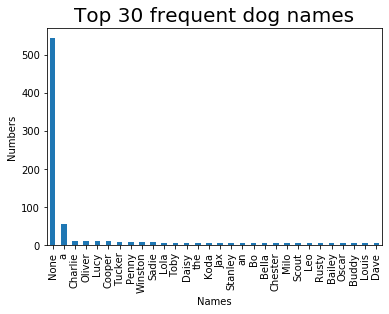

In [177]:
#Check most frequent dogs names
plt.title('Top 30 frequent dog names', size=20)
plt.xlabel('Names')
plt.ylabel('Numbers')
plt.savefig('frequent_dogs_names');

archive_clean['name'].value_counts()[0:30].sort_values(ascending=False).plot(kind = 'bar')

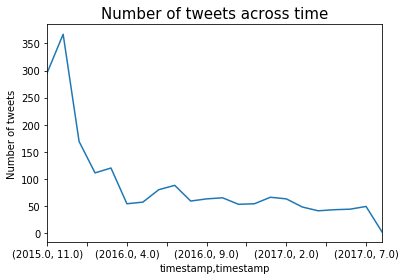

In [178]:
#visualize tweet count trend 
plt.title('Number of tweets across time', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of tweets')
plt.savefig('tweets_over_time');

tweets_stat_fin['tweet_id'].groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).count().plot(kind='line')

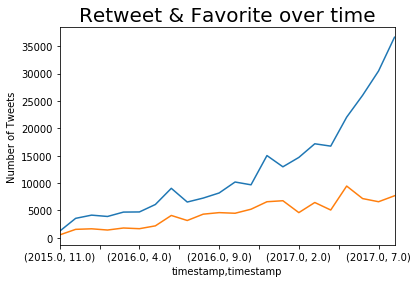

In [179]:
#visualize retweet & favorite count over time
plt.title('Retweet & Favorite over time', size =20)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year,Month)')
#plt.legend('Retweet Count', 'Favorite Count')
plt.savefig('Retweet_Favorite')

tweets_clean.favorite_count.groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).mean().plot(kind='line')
tweets_clean.retweet_count.groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).mean().plot(kind='line')


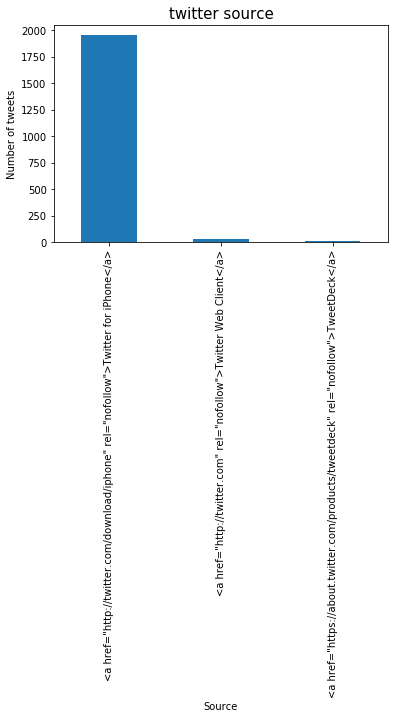

In [180]:
#visualize source trend
plt.title('twitter source', size=15)
plt.xlabel('Source')
plt.ylabel('Number of tweets')
plt.savefig('tweets_source')
tweets_stat_fin['source_x'].value_counts().plot(kind='bar')

In [181]:
tweets_stat_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 55 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id_x          1992 non-null float64
in_reply_to_user_id_x            1992 non-null float64
timestamp                        1992 non-null datetime64[ns, UTC]
source_x                         1992 non-null object
text                             1992 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1992 non-null object
rating_numerator                 1992 non-null float64
rating_denominator               1992 non-null float64
name                             1992 non-null object
dog_classification               1992 non-null category
jpg_url                          2075 non-null object
img_num                          2075 non-null float64
prediction1     

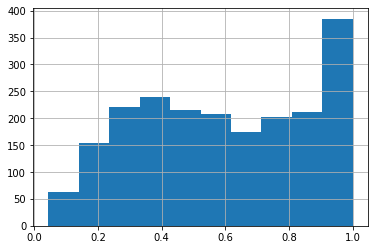

In [182]:
#checking prediction1_confidence
tweets_stat_fin.prediction1_confidence.hist()

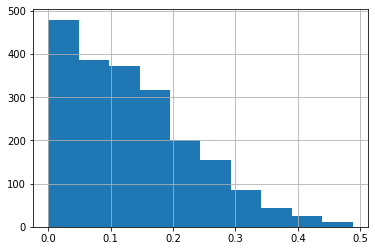

In [183]:
tweets_stat_fin.prediction2_confidence.hist()

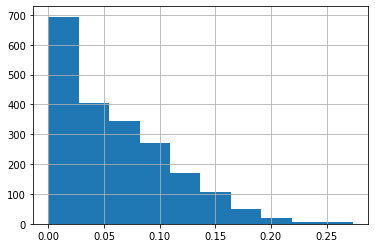

In [184]:
#checking prediction3_confidence
tweets_stat_fin.prediction3_confidence.hist()